# Visualizing Grover's Search Algorithm

This is a companion notebook to the [Exploring Grover's Search Algorithm](./ExploringGroversAlgorithmTutorial.ipynb) tutorial. It helps you explore the algorithm by plotting several graphs that are a lot easier to build using Python than in a purely Q# notebook.

> <font color="red">This notebook contains some heavy computations, and might take a fair amount of time to execute. 
    Precomputed cell outputs are included - you might want to study these before you opt to re-run the cells.</font>

## Running Q# code from Python

To start with, execute this cell using Ctrl+Enter (or ⌘+Enter on a Mac). This is necessary to prepare the environment and import the libraries and operations we'll use later in the tutorial.

In [1]:
import qsharp
import Quantum.Kata.ExploringGroversAlgorithm as Grover

import warnings
warnings.simplefilter('ignore')

%matplotlib inline
from matplotlib import pyplot

Preparing Q# environment...


`GroversAlgorithm_SuccessProbability` is a pre-written Q# operation similar to the one you've implemented in the [exercise 5](./ExploringGroversAlgorithmTutorial.ipynb#Exercise-5:-Calculate-the-success-probability-of-Grover's-algorithm): 
given the instance of a SAT problem and the number of iterations, it runs Grover's search on that instance for that number of iterations and calculates the probability of its success.

You can call this operation from Python as follows (note that the only change in the syntax used for describing instances of SAT problems is that in Q# the constants `true` and `false` are spelled in lowercase, and in Python the first letter is capitalized):

In [2]:
# The SAT instance we want to solve
problem = [[(0, True), (1, True)], [(0, False), (1, False)], [(1, True), (2, True)], [(1, False), (2, False)]]
variableCount = 3

print("Solving SAT problem " + Grover.SATInstanceAsString.simulate(instance = problem) + "...")

# Simulate the algorithm and print the results
successProb = Grover.SuccessProbability_SAT.simulate(N = variableCount, instance = problem, iter = 1)
print("The algorithm succeeds with " + str(successProb * 100) + "% probability")

Solving SAT problem (x0 ∨ x1) ∧ (¬x0 ∨ ¬x1) ∧ (x1 ∨ x2) ∧ (¬x1 ∨ ¬x2)...
The algorithm succeeds with 100.0% probability


Now that we have the tools for running Grover's search algorithm from Python and calculating its success probability, 
let's use them to collect and plot some information about the behavior of the algorithm's success probability.

## Exploring success probability

Let's start by considering a larger problem instance with exactly 1 solution and exploring how the success probability of the algorithm depends on the number of Grover iterations done.

> For the sake of speeding up the plotting we will use hardcoded oracles which implement functions with a given number of solutions instead of a proper SAT-solving oracles. The behaviors we will be exploring do not depend on the exact problem solved by the oracle!

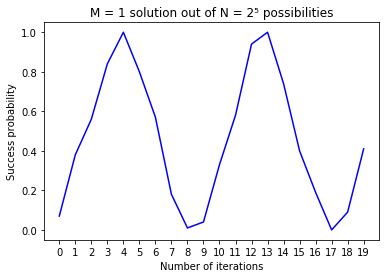

In [3]:
x_points = range(20)
y_points = [-1.0] * 20

for iter in x_points:
    y_points[iter] = Grover.SuccessProbability_Sol.simulate(nQubit = 5, nSol = 1, iter = iter)
    
# Plot the data
fig = pyplot.figure()
ax = fig.add_subplot(111)
p = ax.plot(x_points, y_points, 'b')
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Success probability')
ax.set_title('M = 1 solution out of N = 2⁵ possibilities')
ax.set_xticks(range(20))
fig.show()

We can observe a very important property of the algorithm on this plot: **more iterations does not mean better!**  
The success probability increases until it hits a maximum of 1.0 at 4 iterations, after that it decreases again until a minimum of 0.0 at 8 iterations, and after that the pattern repeats. 

## How to maximize success probability?

Let's take a look at more data: how does success probability change as the number of iterations increases depending on the number of solutions the problem has.

> Note that the execution of this cell can take several minutes.

In [4]:
x_points = range(20)
y_points = []

for sol in range(4):
    yp = [-1.0] * 20
    for iter in x_points:
        yp[iter] = Grover.SuccessProbability_Sol.simulate(nQubit = 5, nSol = sol + 2, iter = iter)
    y_points.append(yp)

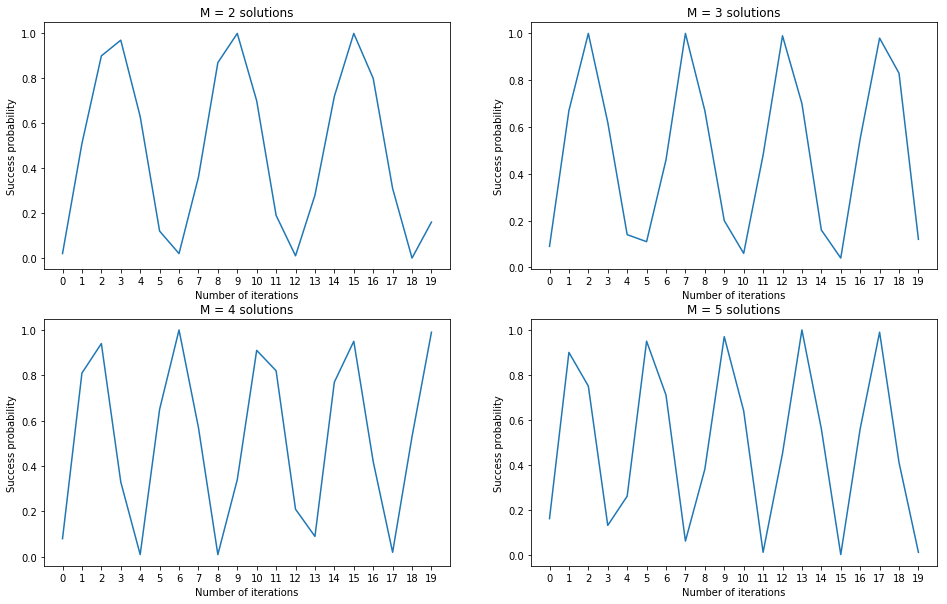

In [5]:
# Plot the data
fig, axes = pyplot.subplots(2, 2, figsize=(16, 10))
for sol in range(4):
    ax = axes.flatten()[sol]
    ax.plot(x_points, y_points[sol])
    ax.set_xlabel('Number of iterations')
    ax.set_ylabel('Success probability')
    ax.set_title('M = ' + str(sol+2) + ' solutions')
    ax.set_xticks(range(20))
fig.show()

You can see that the pattern remains the same on each plot: the success probability increases to nearly 1.0 at a certain number of iterations, after that it decreases to nearly 0.0 at approximately double that number of iterations, and after that the pattern repeats. 

However, the number of iterations at which the maximum success probability is achieved is different for different problems: for problems with 1 solution it was 4 iterations, for 2 solutions - 3 iterations, for 3 and 4 solutions - 2 iterations, and for 5 solutions - 1 iteration. The formula for the optimal number of iterations is 

$$R \approx \frac{\pi}{4} \sqrt{\frac{N}{M}}$$

where $N$ is the size of the search space (in our case we have 5 binary variables, so $N = 2^5 = 32$), $M$ is the number of solutions to the problem (in our case between 1 and 5).

This formula shows the reason Grover's search is so interesting - the classical solution to the search problem requires $O(N)$ evaluations of the function, and Grover's search algorithm allows to do this in $O(\sqrt{N})$ evaluations, providing a quadratic speedup.

### But I don't know how many solutions my problem has!

Indeed, in practical applications you don't usually know how many solutions your problem has before you start solving it. 
In this case you can pick the number of iterations as a random number between 1 and $\frac{\pi}{4} \sqrt{N}$, and if the search did not yield the result on the first run, re-run it with a different number of iterations.

# What's Next?

We hope you've enjoyed this tutorial and learned a lot from it! If you're looking to learn more about quantum computing and Q#, here are some suggestions:

* The [Quantum Katas](https://github.com/microsoft/QuantumKatas/) are sets of programming exercises on quantum computing that can be solved using Q#. They cover a variety of topics, from the basics like the concepts of superposition and measurements to more interesting algorithms like Grover's search.
* In particular, [GroverSearch kata](https://github.com/microsoft/QuantumKatas/tree/master/GroversAlgorithm) offers you exercises on implementing simple quantum oracles and a step-by-step implementation of Grover search algorithm (all the internals that were hidden under the hood of `GroversAlgorithm_Loop` operation in this tutorial!).
* [SolveSATWithGrover kata](https://github.com/microsoft/QuantumKatas/tree/master/SolveSATWithGrover) teaches you how to implement quantum oracles for SAT problems, starting with the simple building blocks like implementing AND and OR operations in a quantum way.
* [GraphColoring kata](https://github.com/microsoft/QuantumKatas/tree/master/GraphColoring) is another interesting kata that teaches you how to implement quantum oracles for graph coloring problems.